In [1]:
import pandas as pd
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
%matplotlib inline
from unbalanced_dataset import SMOTE
from sklearn.cross_validation import KFold
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics
#from code in the GitHub Repro (https://github.com/AnnaVM/SBIR_Project)

In [2]:
cd code

/Users/AnnaVMS/Desktop/Galvanize/SBIR-project/code


In [3]:
from prepare_data import subset_data
from model import Model

In [4]:
cd ..

/Users/AnnaVMS/Desktop/Galvanize/SBIR-project


In [5]:
def tp_fp(labels, predicted_labels):
    labels = np.array(labels)
    predicted_labels = np.array(predicted_labels)
    tp = sum((labels == predicted_labels) & (labels == 1))
    tn = sum((labels == predicted_labels) & (labels == 0))
    fp = sum((labels != predicted_labels) & (predicted_labels == 1))
    fn = sum((labels != predicted_labels) & (predicted_labels == 0))
    return tp, tn, fp, fn

In [6]:
def print_results(tp, tn, fp, fn):
    print 'tp | ', tp
    print 'tn | ',tn
    print 'fp | ', fp
    print 'fn | ', fn
    accuracy = (tp+tn)*1./(tp+tn+fp+fn)
    recall = tp*1./(tp + fn)
    precision = tp*1./(tp + fp)
    print 'accuracy : ',accuracy
    print 'recall : ', recall
    print 'precision : ', precision

In [7]:
df = subset_data('dod', 2012, '/Users/AnnaVMS/Desktop/test2')

['2015-12-14_award_export_10001TO15000.csv', '2015-12-14_award_export_1TO5000.csv', '2015-12-14_award_export_5001TO10000.csv']


prepare_data.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [8]:
interp?

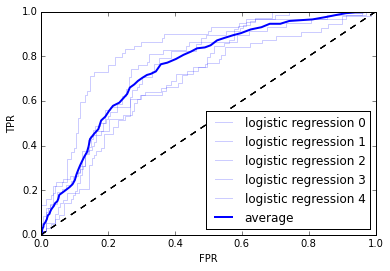

In [14]:
#defining a training and testing set (through indices)
kf = KFold(1016,5, shuffle=True)
index = 0

mean_tpr = 0.0
mean_fpr = 0.0
mean_threshold = np.linspace(0., 1., 100)

for train_index, test_index in kf:
    model_test = Model(df, train_index, test_index)
    model_test.process_text('Abstract')
    model_test.prepare_LogReg()
    model_test.perform_LogReg()
    
    prob = model_test.model_LogReg.predict_proba(model_test.LogReg_Xtest)
    labels = model_test.LogReg_ytest
    
    fpr, tpr, thresholds = metrics.roc_curve(labels, prob[:,1])
    
    mean_tpr += interp(mean_threshold, thresholds[::-1], tpr[::-1])
    mean_fpr += interp(mean_threshold, thresholds[::-1], fpr[::-1])
    #mean_tpr[0] = 0.0
    #mean_fpr[0] = 0.0
    
    plt.plot(fpr, tpr, label='logistic regression %s'%str(index), color='blue', alpha=0.2)
    plt.plot([0,1], [0,1], ls='dashed', c='k')
    plt.xlabel('FPR')
    plt.ylabel('TPR')

    index+=1


mean_tpr = mean_tpr *1./5
mean_fpr = mean_fpr *1./5
plt.plot(mean_fpr, mean_tpr, lw=2, label='logistic regression average', color='blue')
plt.legend(loc=4)

In [10]:
print mean_tpr[50]
print mean_fpr[50]

0.3255874703
0.104026313209


In [11]:

predicted_labels = model_test.model_LogReg.predict(model_test.LogReg_Xtest)
tp, tn, fp, fn = tp_fp(labels, predicted_labels)

In [12]:
print_results(tp, tn, fp, fn)

tp |  17
tn |  131
fp |  17
fn |  38
accuracy :  0.729064039409
recall :  0.309090909091
precision :  0.5


In [13]:
train_index, test_index = kf_iterator.next()
model_test = Model(df, train_index, test_index)
model_test.process_text('Abstract')
model_test.prepare_LogReg()
model_test.perform_LogReg()
labels = model_test.LogReg_ytest
predicted_labels = model_test.model_LogReg.predict(model_test.LogReg_Xtest)
tp1, tn1, fp1, fn1 = tp_fp(labels, predicted_labels)

NameError: name 'kf_iterator' is not defined

In [ ]:
print_results(tp1, tn1, fp1, fn1)

In [ ]:
train_index, test_index = kf_iterator.next()
model_test = Model(df, train_index, test_index)
model_test.process_text('Abstract')
model_test.prepare_LogReg()
model_test.perform_LogReg()
labels = model_test.LogReg_ytest
predicted_labels = model_test.model_LogReg.predict(model_test.LogReg_Xtest)
tp2, tn2, fp2, fn2 = tp_fp(labels, predicted_labels)

In [ ]:
print_results(tp2, tn2, fp2, fn2)

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(labels, prob[:,1])

In [ ]:
plt.plot(fpr, tpr, label='logistic regression')
plt.plot([0,1], [0,1], ls='dashed', c='k')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc=4)

In [ ]:
metrics.roc_curve?